In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

In [4]:
df= pd.read_csv(r"C:\Users\SARA\Downloads\Social_Network_Ads.csv")

In [6]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [16]:
df["Gender"].replace(["Female", "Male"], (0,1), inplace =True)

C:\Users\SARA\AppData\Local\Temp\ipykernel_7096\1613237201.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace(["Female", "Male"], (0,1), inplace =True)


In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [24]:
X = df.drop(columns =["User ID", "Purchased"])
Y = df["Purchased"]

In [26]:
print(X)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


In [28]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [30]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state =42)

In [36]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [38]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred= classifier.predict(x_test)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion matrix\n", cm)

TN, FP, FN, TP =cm.ravel()
accuracy= accuracy_score(y_test,y_pred)
error_rate = 1- accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"True Positives: {TP}")
print(f"False Positive: {FP}")
print(f"False Negative:{FN}")
print(f"True negative: {TN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"error rate: {error_rate:.2f}")


 Confusion matrix
 [[61  2]
 [10 27]]
True Positives: 27
False Positive: 2
False Negative:10
True negative: 61
Accuracy: 0.88
Precision: 0.93
Recall : 0.73
error rate: 0.12


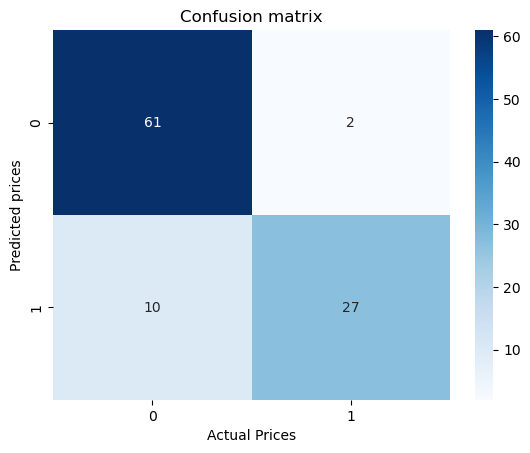

In [54]:
sns.heatmap(cm, annot= True, fmt = 'd', cmap='Blues')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Confusion matrix")
plt.show()